Đang xử lý bộ dữ liệu: ../data/1_ThreeProvinces.csv
Số thành phố: 3
Đường đi tối ưu: [1, 2, 3, 1]
Độ dài đường đi tối ưu tìm được: 209.51
Thời gian chạy (s): 0.03


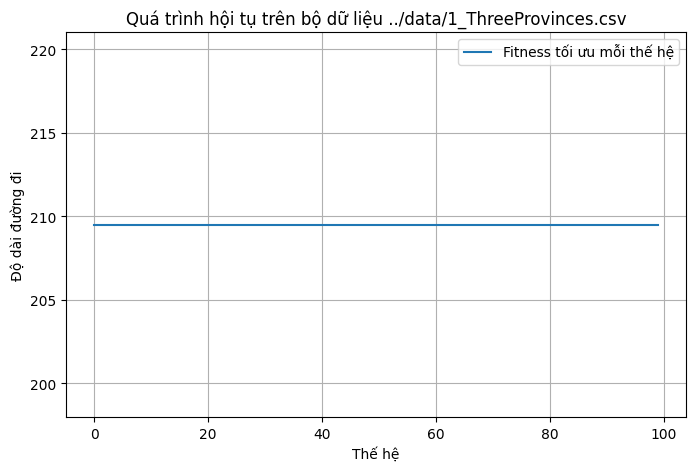

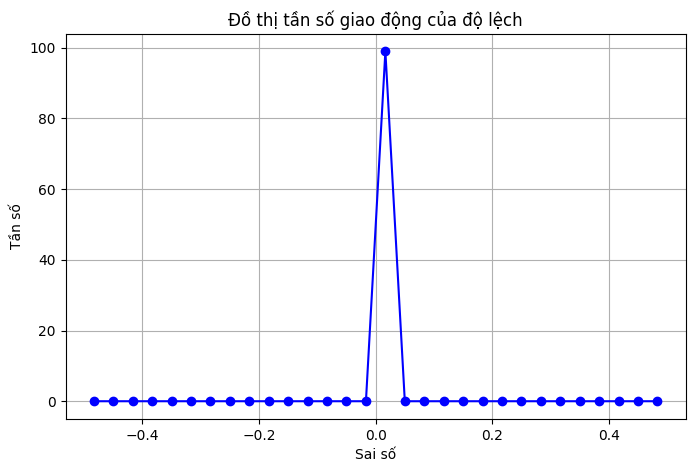

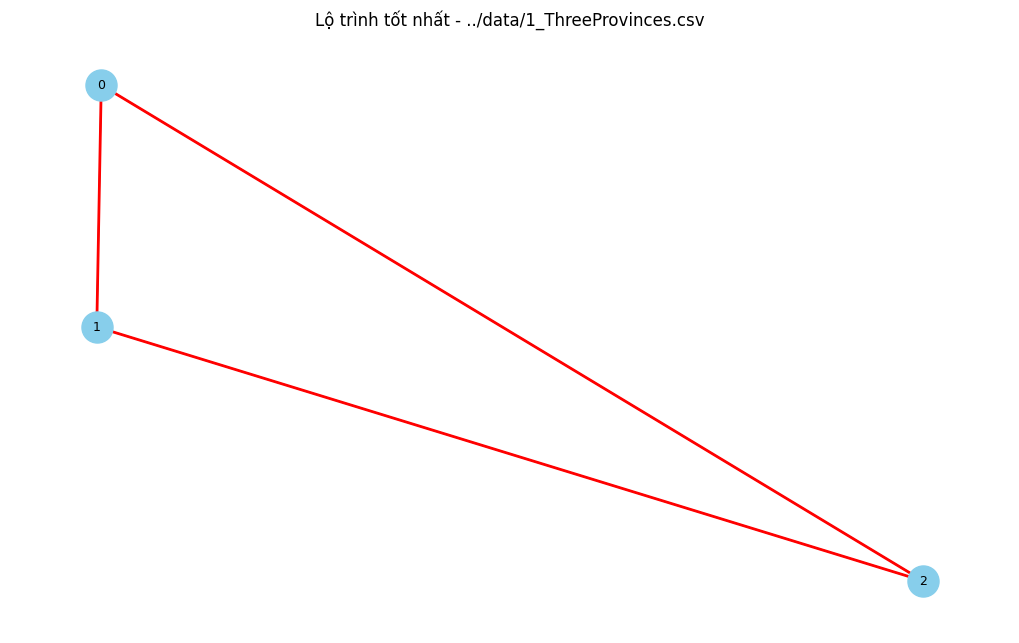

Đang xử lý bộ dữ liệu: ../data/2_SouthEast.csv
Số thành phố: 6
Đường đi tối ưu: [1, 6, 5, 3, 2, 4, 1]
Độ dài đường đi tối ưu tìm được: 426.02
Thời gian chạy (s): 0.04


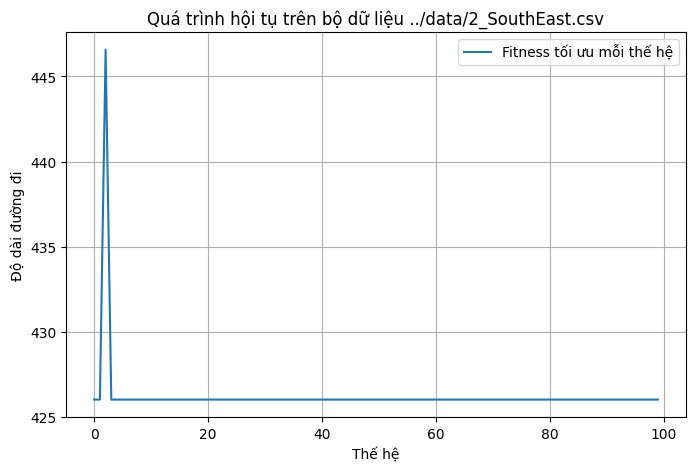

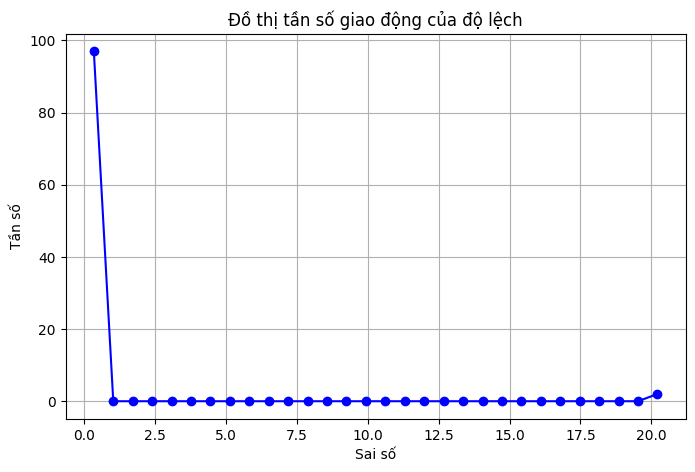

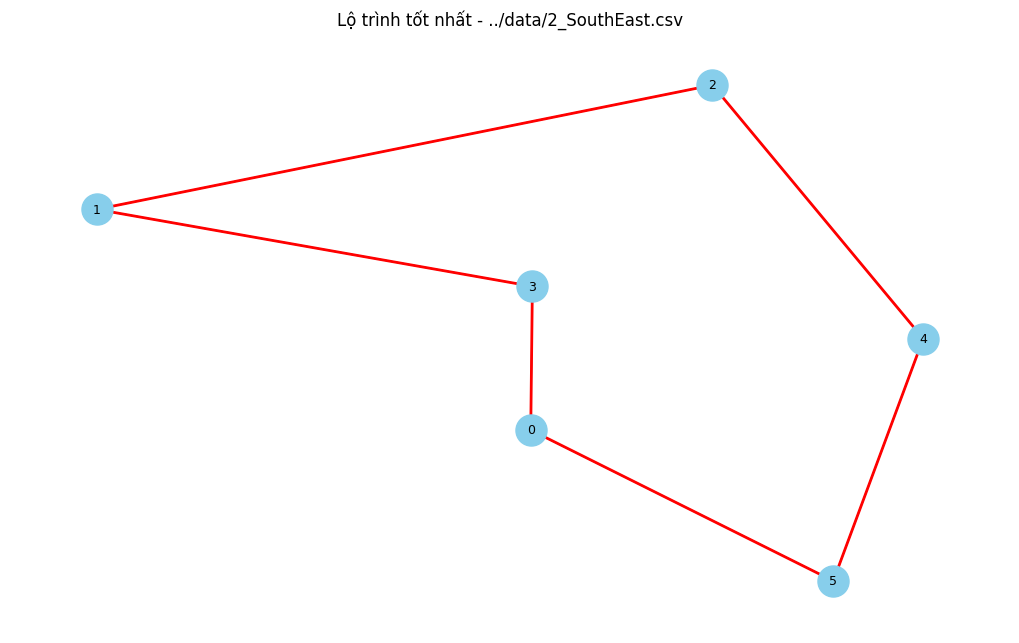

Đang xử lý bộ dữ liệu: ../data/3_MekongDelta.csv
Số thành phố: 13
Đường đi tối ưu: [1, 7, 8, 11, 9, 12, 13, 10, 4, 3, 2, 5, 6, 1]
Độ dài đường đi tối ưu tìm được: 705.80
Thời gian chạy (s): 0.06


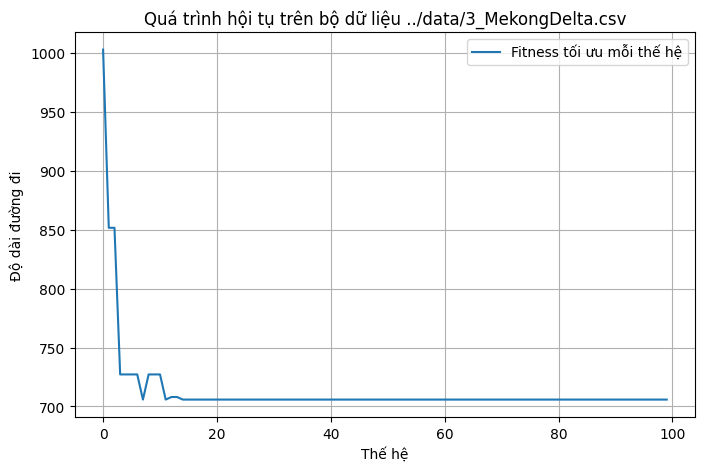

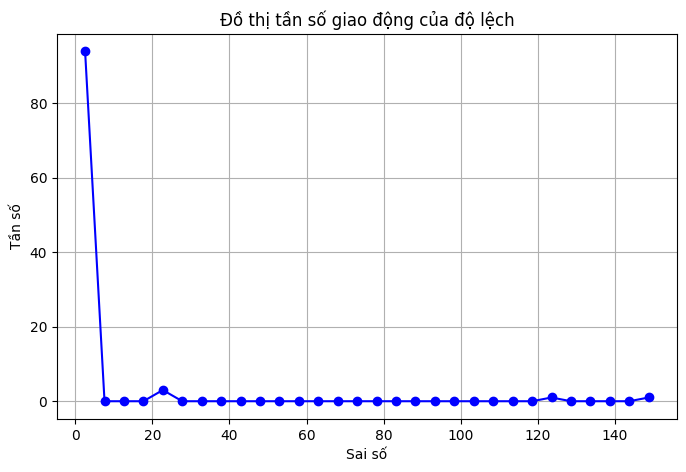

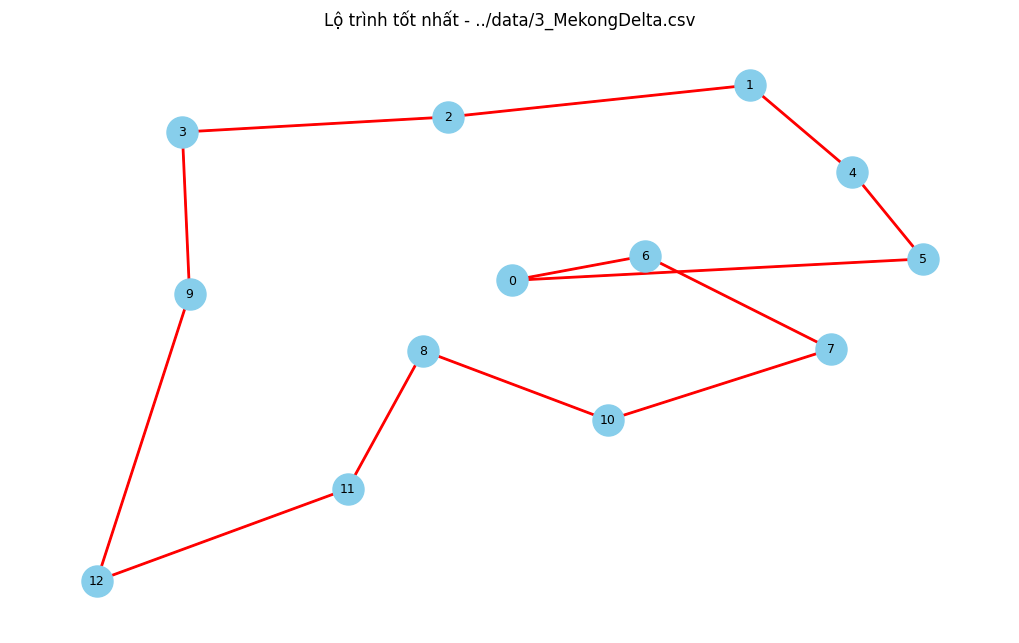

Đang xử lý bộ dữ liệu: ../data/4_SouthRegion.csv
Số thành phố: 19
Đường đi tối ưu: [1, 3, 2, 5, 18, 4, 8, 7, 10, 9, 19, 12, 16, 15, 17, 14, 13, 11, 6, 1]
Độ dài đường đi tối ưu tìm được: 1153.11
Thời gian chạy (s): 0.09


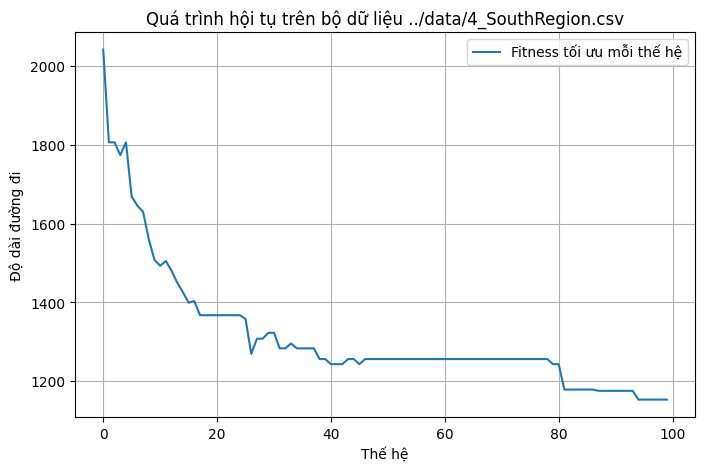

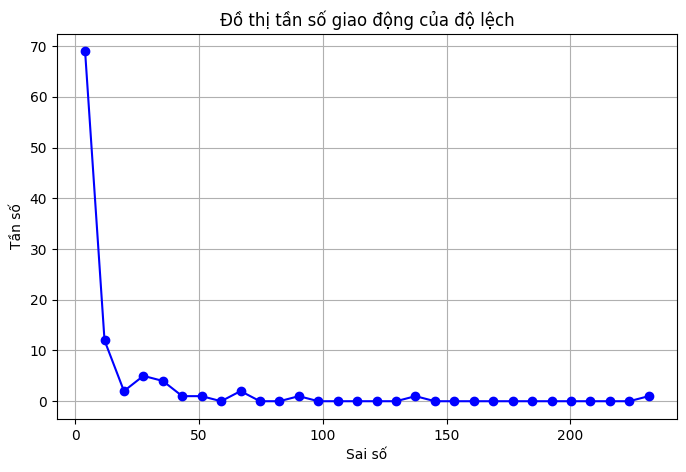

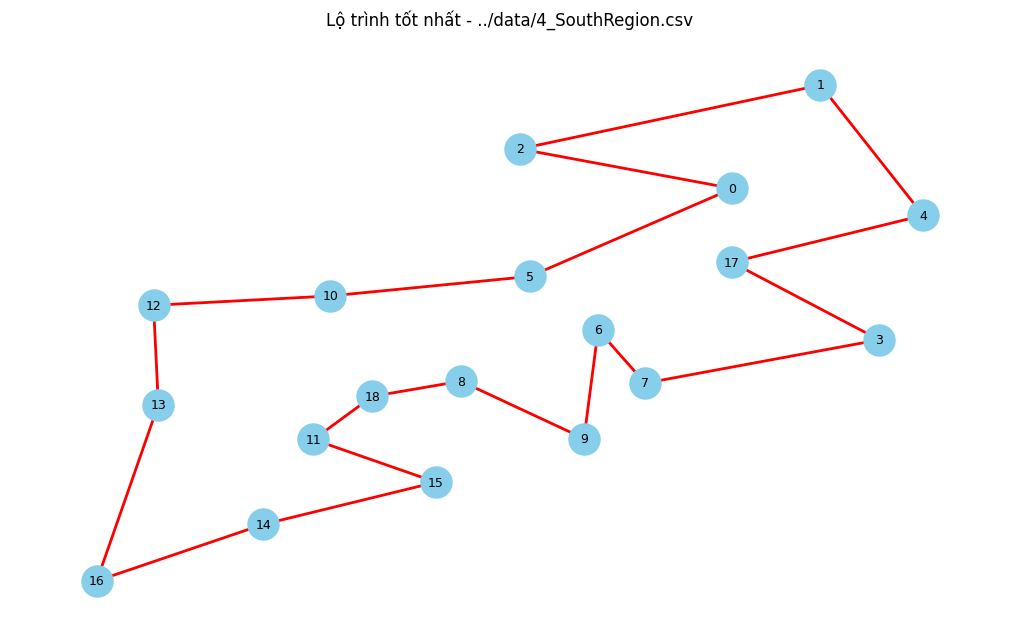

Đang xử lý bộ dữ liệu: ../data/5_CentralRegion.csv
Số thành phố: 19
Đường đi tối ưu: [1, 2, 3, 4, 5, 6, 19, 7, 14, 17, 18, 13, 12, 11, 10, 16, 15, 9, 8, 1]
Độ dài đường đi tối ưu tìm được: 2482.33
Thời gian chạy (s): 0.14


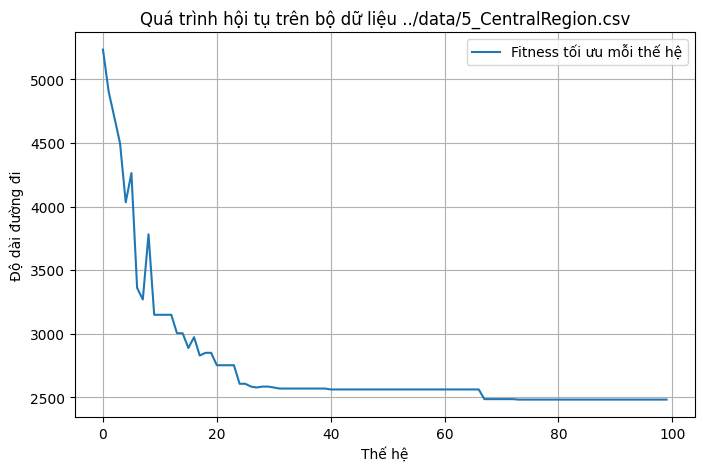

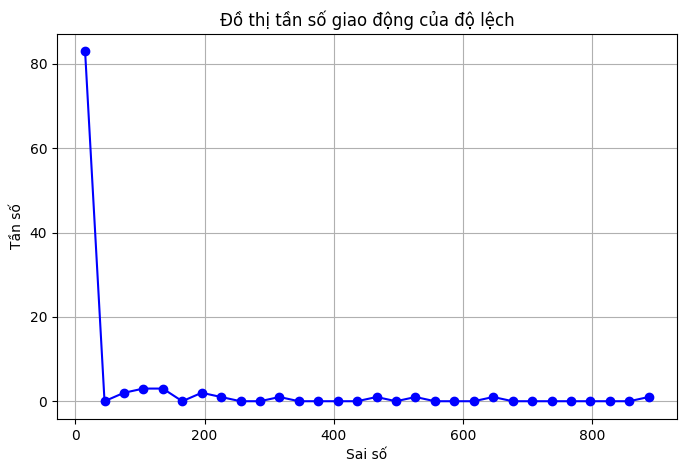

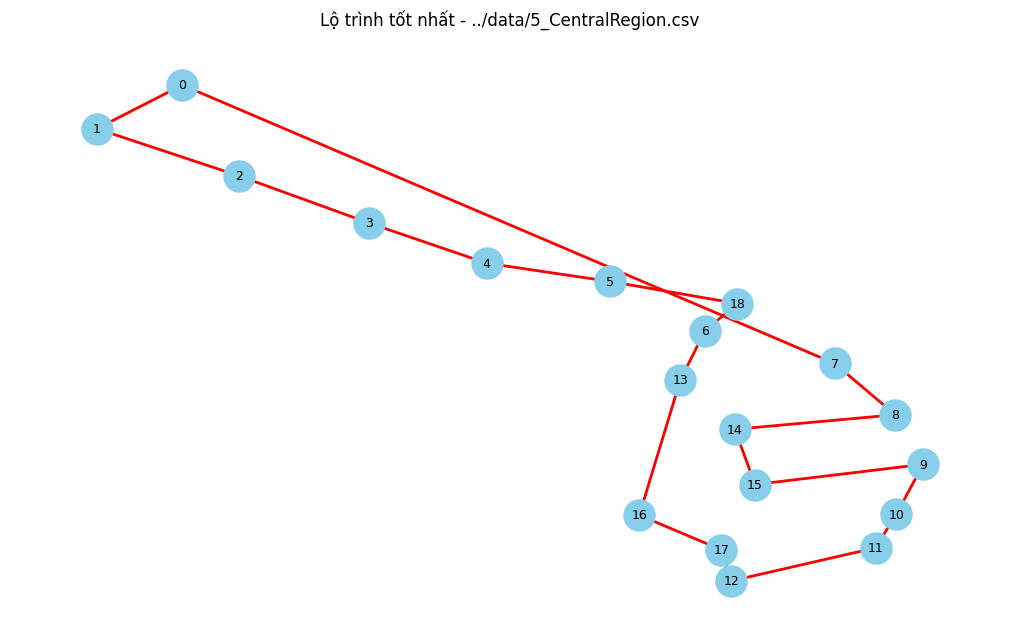

Đang xử lý bộ dữ liệu: ../data/6_NorthRegion.csv
Số thành phố: 25
Đường đi tối ưu: [1, 2, 3, 4, 9, 20, 19, 8, 18, 6, 10, 11, 13, 14, 12, 7, 15, 17, 23, 22, 24, 21, 16, 25, 5, 1]
Độ dài đường đi tối ưu tìm được: 1733.84
Thời gian chạy (s): 0.12


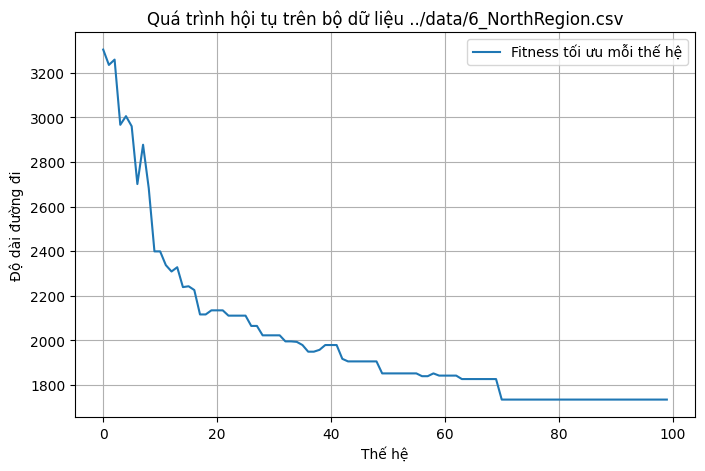

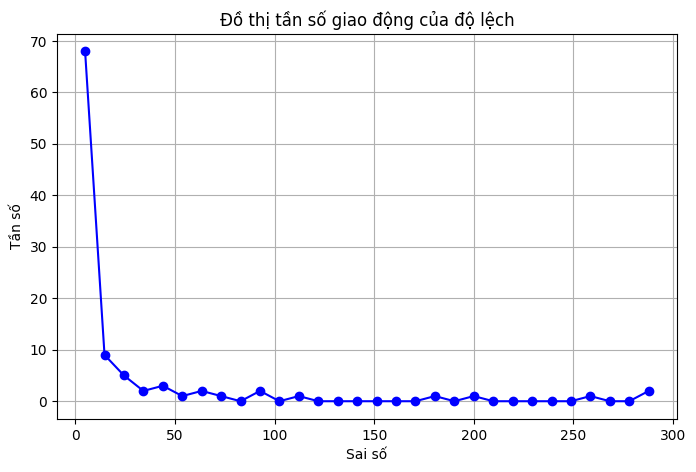

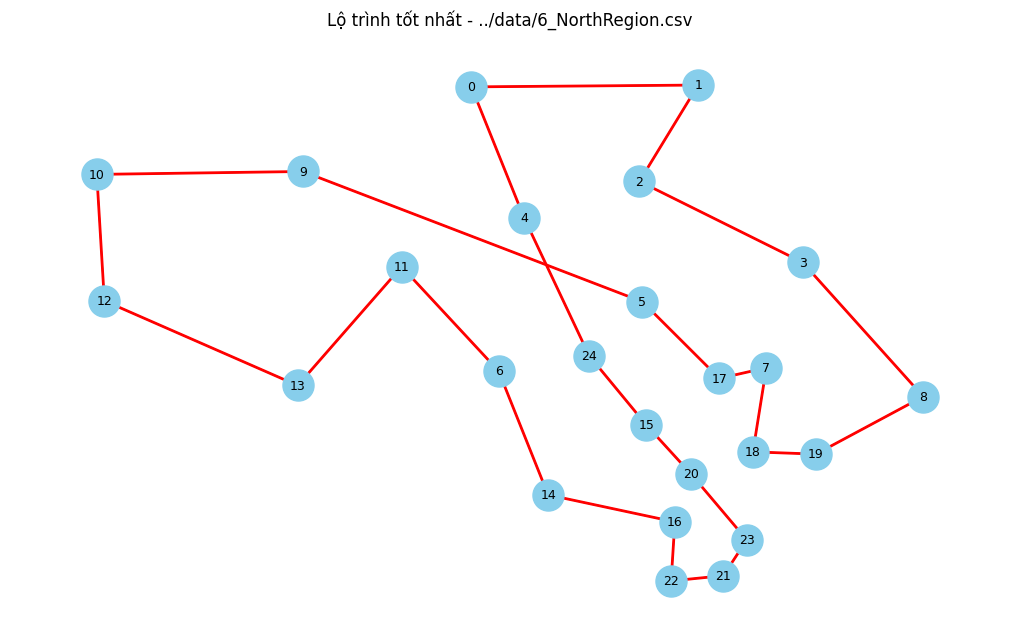

Đang xử lý bộ dữ liệu: ../data/7_SouthandCentral.csv
Số thành phố: 38
Đường đi tối ưu: [1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 19, 14, 16, 17, 13, 34, 36, 26, 25, 37, 22, 21, 23, 27, 29, 35, 31, 28, 38, 33, 32, 30, 20, 24, 18, 15, 8, 3, 1]
Độ dài đường đi tối ưu tìm được: 5031.08
Thời gian chạy (s): 0.18


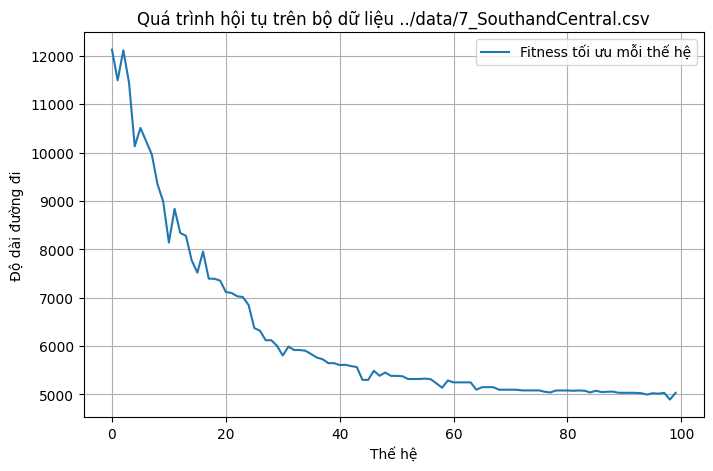

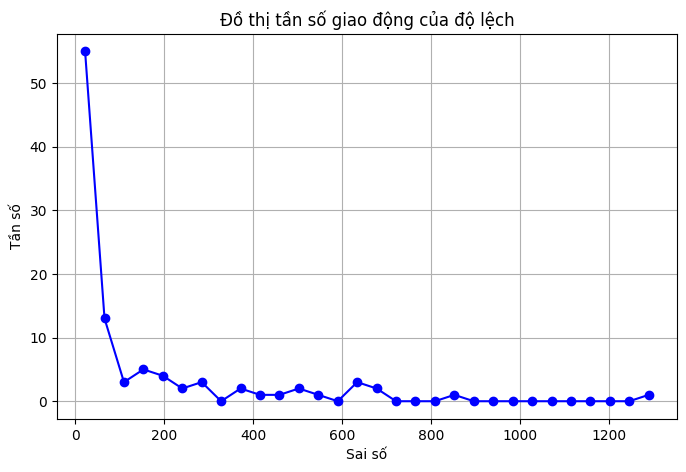

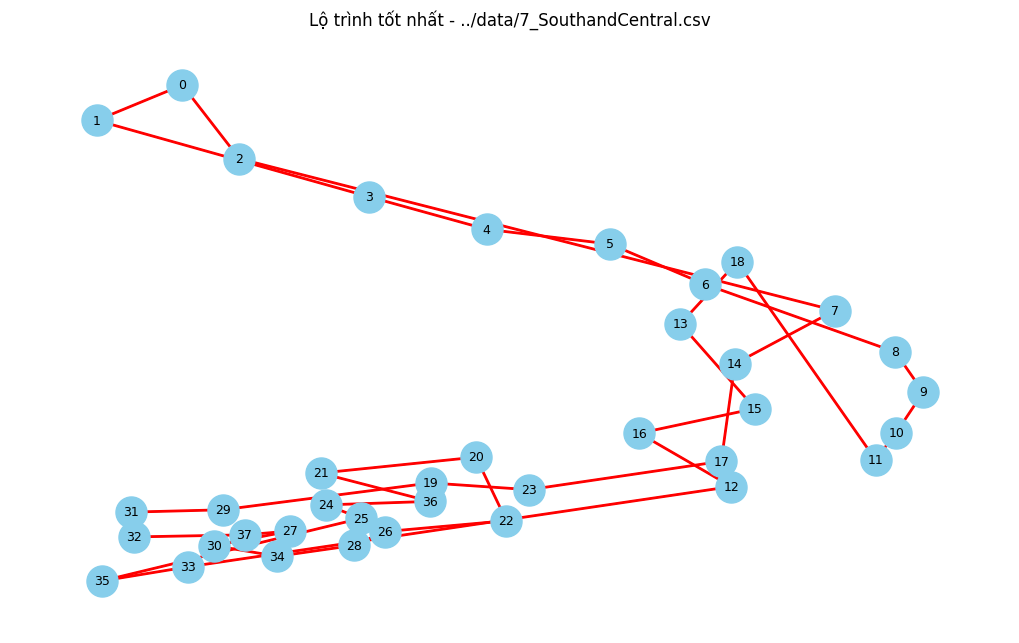

Đang xử lý bộ dữ liệu: ../data/8_VietNam.csv
Số thành phố: 63
Đường đi tối ưu: [1, 33, 11, 16, 36, 10, 53, 28, 58, 20, 59, 13, 61, 2, 5, 29, 9, 31, 24, 49, 26, 40, 41, 6, 14, 55, 62, 18, 4, 23, 25, 56, 42, 37, 54, 44, 52, 30, 60, 63, 27, 35, 38, 21, 7, 8, 57, 47, 48, 15, 50, 45, 34, 32, 43, 12, 51, 19, 17, 22, 3, 46, 39, 1]
Độ dài đường đi tối ưu tìm được: 14763.81
Thời gian chạy (s): 0.32


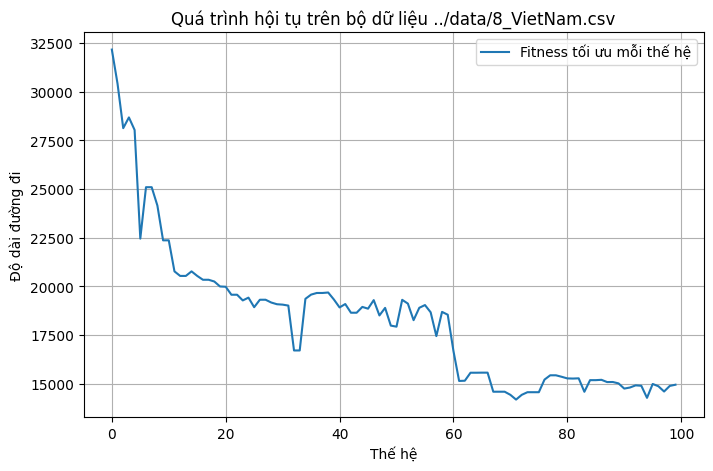

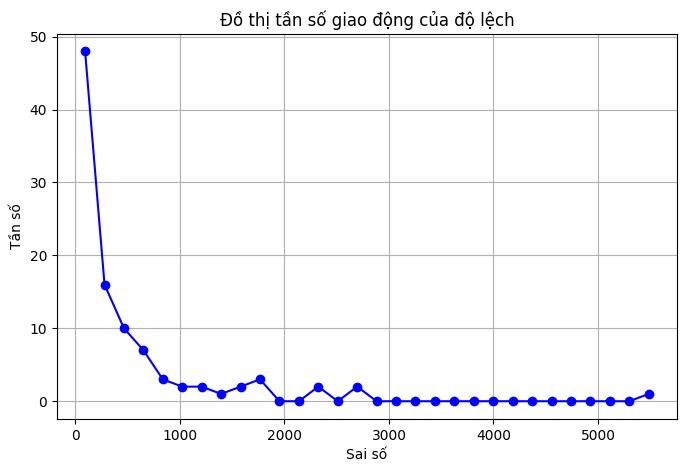

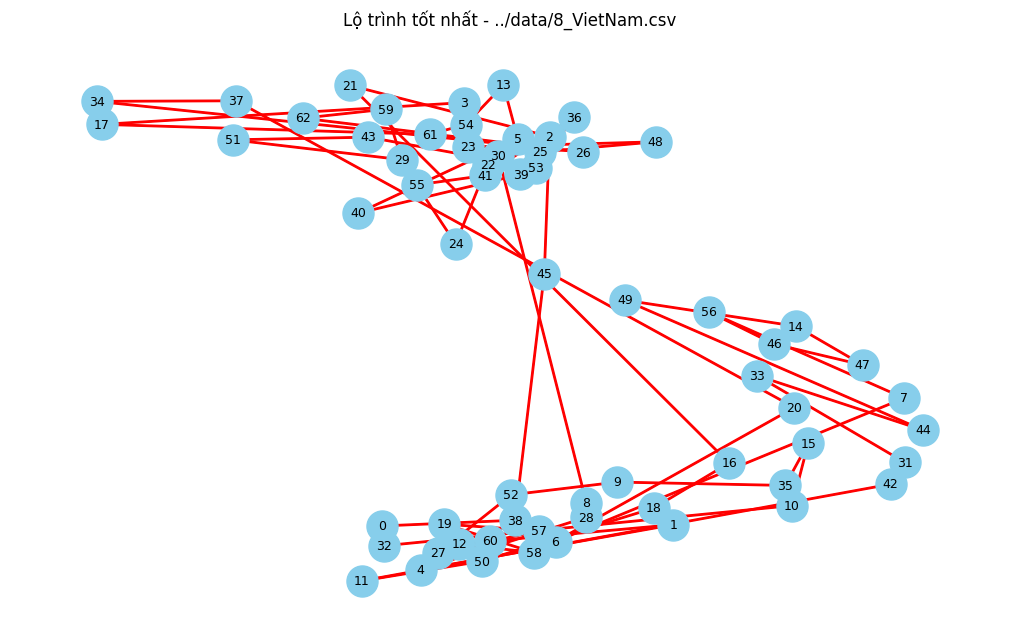


--- Tổng kết kết quả đánh giá ---
../data/1_ThreeProvinces.csv - Số thành phố: 3 - Độ dài tối ưu: 209.51 - Thời gian: 0.03s
../data/2_SouthEast.csv - Số thành phố: 6 - Độ dài tối ưu: 426.02 - Thời gian: 0.04s
../data/3_MekongDelta.csv - Số thành phố: 13 - Độ dài tối ưu: 705.80 - Thời gian: 0.06s
../data/4_SouthRegion.csv - Số thành phố: 19 - Độ dài tối ưu: 1153.11 - Thời gian: 0.09s
../data/5_CentralRegion.csv - Số thành phố: 19 - Độ dài tối ưu: 2482.33 - Thời gian: 0.14s
../data/6_NorthRegion.csv - Số thành phố: 25 - Độ dài tối ưu: 1733.84 - Thời gian: 0.12s
../data/7_SouthandCentral.csv - Số thành phố: 38 - Độ dài tối ưu: 5031.08 - Thời gian: 0.18s
../data/8_VietNam.csv - Số thành phố: 63 - Độ dài tối ưu: 14763.81 - Thời gian: 0.32s


In [4]:
import pandas as pd
import time
import math
import numpy as np
import os
import matplotlib.pyplot as plt
from TSP import compute_distance_matrix, visualize
from GA import solve

def load_locations_from_csv(file_path):
    """
    Giả định file csv có cột 'lat' và 'lon' hoặc tương tự.
    """
    df = pd.read_csv(file_path)
    if 'lat' in df.columns and 'lon' in df.columns:
        locations = list(zip(df['lat'], df['lon']))
    elif 'latitude' in df.columns and 'longitude' in df.columns:
        locations = list(zip(df['latitude'], df['longitude']))
    else:
        raise ValueError("CSV phải có cột 'lat' và 'lon' hoặc 'latitude' và 'longitude'")
    return locations

def evaluate_ga_on_dataset(file_path,
                           population_size=100,
                           generations=100,
                           mutation_rate=0.01,
                           mutation_algorithm='swap',
                           crossover_algorithm='single_point',
                           selection_algorithm='tournament'):
    print(f"Đang xử lý bộ dữ liệu: {file_path}")

    # Load tọa độ
    locations = load_locations_from_csv(file_path)
    n_cities = len(locations)
    print(f"Số thành phố: {n_cities}")

    # Tính ma trận khoảng cách
    distance_matrix = compute_distance_matrix(locations)

    # Chạy GA
    start_time = time.time()
    distance, route, fitness_history = solve(
        problem=distance_matrix,
        population_size=population_size,
        generations=generations,
        mutation_rate=mutation_rate,
        mutation_algorithm=mutation_algorithm,
        crossover_algorithm=crossover_algorithm,
        selection_algorithm=selection_algorithm
    )
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Đường đi tối ưu:", route)
    print(f"Độ dài đường đi tối ưu tìm được: {distance:.2f}")
    print(f"Thời gian chạy (s): {elapsed_time:.2f}")

    # Vẽ đồ thị quá trình hội tụ
    plt.figure(figsize=(8, 5))
    plt.plot(fitness_history, label='Fitness tối ưu mỗi thế hệ')
    plt.xlabel('Thế hệ')
    plt.ylabel('Độ dài đường đi')
    plt.title(f'Quá trình hội tụ trên bộ dữ liệu {file_path}')
    plt.legend()
    plt.grid(True)
    plt.show()

    fitness_diff = np.abs(np.diff(fitness_history))
    # Tính tần số xuất hiện các giá trị độ lệch bằng np.histogram
    counts, bin_edges = np.histogram(fitness_diff, bins=30)

# Tính giá trị trung bình mỗi bin để làm trục X
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    plt.figure(figsize=(8, 5))
    plt.plot(bin_centers, counts, marker='o', linestyle='-', color='blue')
    plt.xlabel('Sai số')
    plt.ylabel('Tần số')
    plt.title('Đồ thị tần số giao động của độ lệch')
    plt.grid(True)
    plt.show()


    # Hiển thị lộ trình trên bản đồ
    visualize(locations, [city-1 for city in route], title=f'Lộ trình tốt nhất - {file_path}')

    return {
        'file': file_path,
        'num_cities': n_cities,
        'best_distance': distance,
        'time_sec': elapsed_time,
        'fitness_history': fitness_history,
        'best_route': route
    }

if __name__ == "__main__":
    # Danh sách các file csv cần đánh giá (thay thế bằng đường dẫn file thực tế)
    datasets = [
        "../data/1_ThreeProvinces.csv",
        "../data/2_SouthEast.csv",
        "../data/3_MekongDelta.csv",
        "../data/4_SouthRegion.csv",
        "../data/5_CentralRegion.csv",
        "../data/6_NorthRegion.csv",
        "../data/7_SouthandCentral.csv",
        "../data/8_VietNam.csv"
        
        # Thêm các file khác nếu có
    ]

    results = []
    for datafile in datasets:
        try:
            res = evaluate_ga_on_dataset(datafile)
            results.append(res)
        except Exception as e:
            print(f"Lỗi khi xử lý {datafile}: {e}")

    # In tóm tắt kết quả
    print("\n--- Tổng kết kết quả đánh giá ---")
    for r in results:
        print(f"{r['file']} - Số thành phố: {r['num_cities']} - Độ dài tối ưu: {r['best_distance']:.2f} - Thời gian: {r['time_sec']:.2f}s")
